# Computer vision assignment

In [38]:
# Importing required modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

### #1 Problem statement on OpenCV

You have to design a program which accepts coordinate arguments as A,B,C,D and image path. The output will be the distorted image according to given coordinates. 


In [39]:
# Defining a function to linearly transform image using source points, 
# destination points and image path as inputs
def transform(image_path, source_points, destination_points):
    # Converting the points to a numpy array
    source_points = np.array(source_points).astype(np.float32)
    destination_points = np.array(destination_points).astype(np.float32)
    # First we get the transformation matrix from the set of points we have
    M = cv2.getPerspectiveTransform(source_points, destination_points)
    # Reading in the image from its path
    image = cv2.imread(image_path)
    # Convert from BGR space to RGB space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Image size
    img_size = (image.shape[1], image.shape[0])
    # Transforming the image
    transformed = cv2.warpPerspective(image, M, img_size, flags = cv2.INTER_LINEAR)
    # Return the transformed image
    return transformed

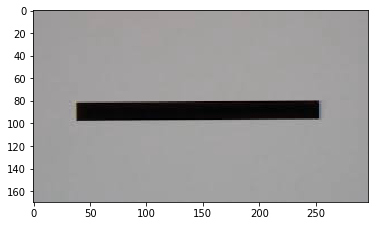

In [84]:
# Reading in a test image
image = cv2.imread('test_image1.jpg')

# Displaying the image
plt.imshow(image)
plt.show()

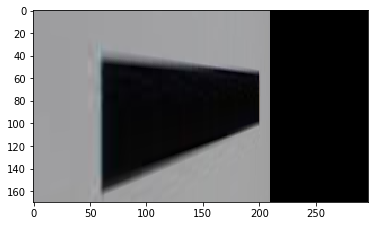

In [85]:
# Image path
image_path = 'test_image1.jpg'

# Defining source and destination points
source_points = [[38, 81], [38, 96], [254, 80], [254, 96]]
destination_points = [[60, 40], [60, 150], [200, 55], [200, 100]]

# Calling in transform() function on the above image
transformed = transform(image_path, source_points, destination_points)

# Displaying the transformed image
plt.imshow(transformed)
plt.show()

### #2 Problem statement on python without library

* Take any image as input and give a zoomed image as output. 
* Width and height needs to be same of input and output image. 
* Take pivot point (where to zoom) and scale as parameters. 
* You can only use image libraries for loading and saving images, NOT for the function part.

In [82]:
# Defining the function that takes an image as input and returns a zoomed image 
# according to the specified scale and pivot point
def zoom(image, pivot_point, scale):
    # Storing dimensions of the input image
    img_shape = image.shape
    img_height = img_shape[0]
    img_width = img_shape[1]
    # Calculating the width and height of the portion of the image retained after scaling
    retained_height, retained_width = img_height/scale, img_width/scale
    # Calculating the position of the pixels of the retained portion after selecting the pivot point
    pivot_y, pivot_x = pivot_point[0], pivot_point[1]
    x_high = int(pivot_x + (retained_width / 2))
    x_low = int(pivot_x - (retained_width / 2))
    y_high = int(pivot_y + (retained_height / 2))
    y_low = int(pivot_y - (retained_height / 2))
    # Slicing only the portion of the image to be retained after zooming
    retained = image[y_low:y_high, x_low:x_high, :]
    # Blank image of original size
    new_image = np.zeros(img_shape)
    # Using the pixels of the retained image portion to construct the new image of the original size
    for row in range(img_height):
        for col in range(img_width):
            new_image[row][col] = 255 - retained[int(row/scale)][int(col/scale)]
    # Returning the new image
    return new_image

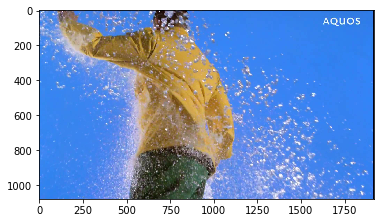

In [76]:
# Reading a test image
image = cv2.imread('test_image2.jpg')

# Converting the image from BGR color space to RGB color space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Displaying the original test image before zooming
plt.imshow(image)
plt.show()

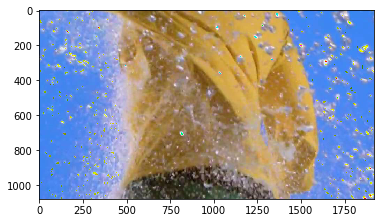

In [83]:
# Defining pivot point and scale
pivot_point = [600, 800]
scale = 2

# Calling the zoom() function on the test image
zoomed = zoom(image, pivot_point, scale)

# Displaying the zoomed image
plt.imshow(zoomed)
plt.show()